In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df_btc = pd.read_csv('./data/BTC-USD.csv', index_col='Date')
df_eth = pd.read_csv('./data/ETH-USD.csv', index_col='Date')
df_sol = pd.read_csv('./data/SOL-USD.csv', index_col='Date')
df_dog = pd.read_csv('./data/DOGE-USD.csv', index_col='Date')

In [3]:
df = pd.DataFrame({"BTC": df_btc['Adj Close'],
                   "ETH": df_eth['Adj Close'],
                   "SOL": df_sol['Adj Close'],
                   "DOG": df_dog['Adj Close']})
df

,BTC,ETH,SOL,DOG
Date,,,,
2021-01-26,32569.849609,1357.058105,4.047350,0.008255
2021-01-27,30432.546875,1253.187134,3.690587,0.007482
2021-01-28,33466.097656,1332.492188,3.822072,0.034084
2021-01-29,34316.386719,1382.522827,3.834676,0.047162
2021-01-30,34269.523438,1376.115479,4.224276,0.028176
...,...,...,...,...
2022-01-22,35030.250000,2405.181152,94.178368,0.132892
2022-01-23,36276.804688,2535.039063,99.578224,0.141863
2022-01-24,36654.328125,2440.352295,91.650162,0.137798


In [4]:
df.describe()

,BTC,ETH,SOL,DOG
count,366.000000,366.000000,366.000000,366.000000
mean,47873.449736,2914.408263,89.418127,0.214842
std,9353.423008,932.855759,75.602053,0.115914
min,29807.347656,1253.187134,3.690587,0.007482
25%,40060.935547,2110.035767,27.846708,0.158029
50%,47747.423828,2889.820190,43.347340,0.217729
75%,56187.017578,3737.867432,159.075340,0.272026
max,67566.828125,4812.087402,258.934326,0.684777


In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = scaler.fit_transform(df)

In [6]:
df_scaled = pd.DataFrame(scaled, columns = df.columns, index= df.index )
df_scaled.head()

,BTC,ETH,SOL,DOG
Date,,,,
2021-01-26,7.316049,2.918626,0.139773,0.114130
2021-01-27,1.655741,0.000000,0.000000,0.000000
2021-01-28,9.689620,2.228358,0.051514,3.927683
2021-01-29,11.941475,3.634148,0.056452,5.858599
2021-01-30,11.817365,3.454110,0.209090,3.055389


Text(0.5, 1.0, 'Scaled Cryto Price')

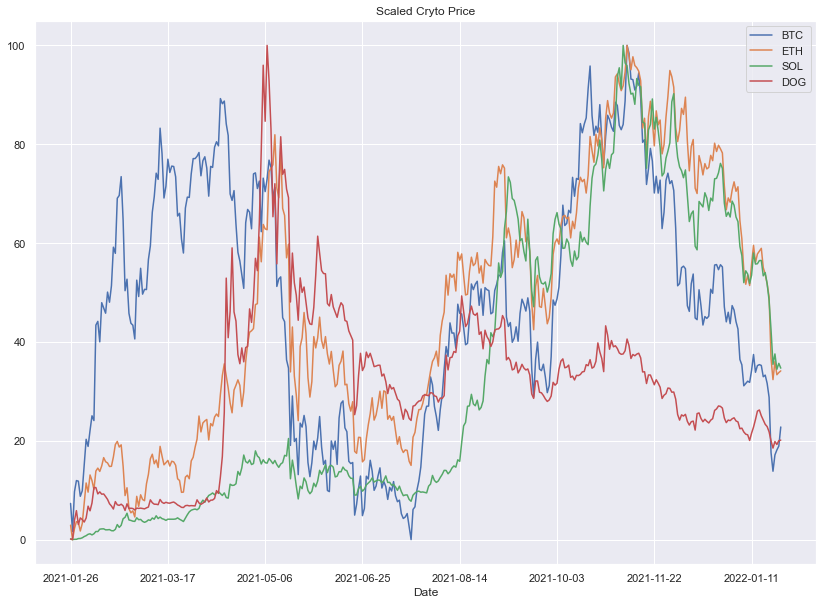

In [7]:
df_scaled.plot(figsize=(14,10))
plt.title('Scaled Cryto Price')

## Calculating Returns of Single Day

In [8]:
daily_returns = df.pct_change().dropna()
daily_returns

,BTC,ETH,SOL,DOG
Date,,,,
2021-01-27,-0.065622,-0.076541,-0.088147,-0.093640
2021-01-28,0.099681,0.063283,0.035627,3.555466
2021-01-29,0.025407,0.037547,0.003298,0.383699
2021-01-30,-0.001366,-0.004635,0.101599,-0.402570
2021-01-31,-0.033708,-0.044422,0.009438,0.320131
...,...,...,...,...
2022-01-22,-0.039143,-0.059716,-0.158867,-0.068340
2022-01-23,0.035585,0.053991,0.057336,0.067506
2022-01-24,0.010407,-0.037351,-0.079616,-0.028654


(-0.4, 0.4)

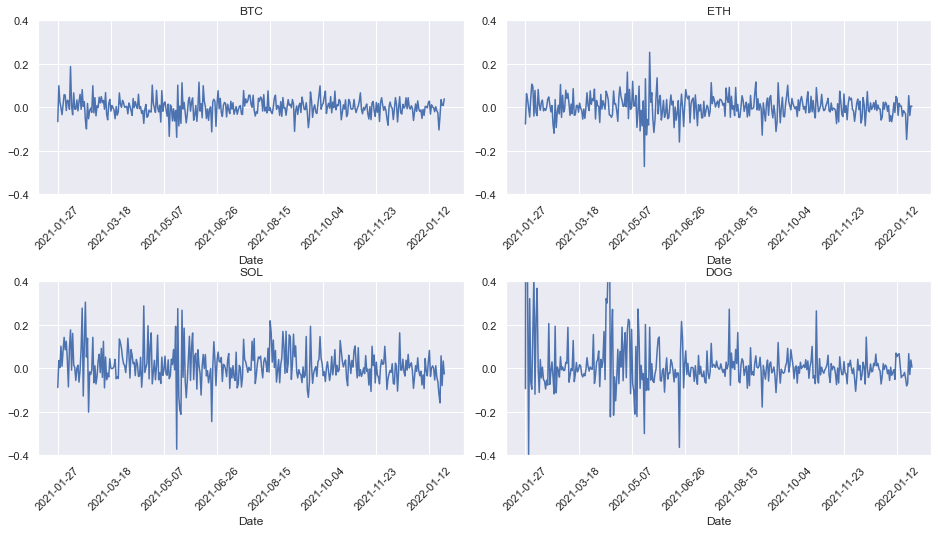

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16,8), gridspec_kw = {'hspace':0.5, 'wspace':0.1})
plt.sca(ax[0, 0])
daily_returns['BTC'].plot()
plt.title('BTC')
plt.xticks(rotation=45)
plt.ylim([-0.4 , 0.4])

plt.sca(ax[0, 1])
daily_returns['ETH'].plot()
plt.title('ETH')
plt.xticks(rotation=45)
plt.ylim([-0.4 , 0.4])

plt.sca(ax[1, 0])
daily_returns['SOL'].plot()
plt.title('SOL')
plt.xticks(rotation=45)
plt.ylim([-0.4 , 0.4])

plt.sca(ax[1, 1])
daily_returns['DOG'].plot()
plt.title('DOG')
plt.xticks(rotation=45)
plt.ylim([-0.4 , 0.4])

## Volatility

In [10]:
daily_returns.std()

BTC    0.040346
ETH    0.052390
SOL    0.080356
DOG    0.215625
dtype: float64

## Mean Return

In [11]:
daily_returns.mean()

BTC    0.001262
ETH    0.003022
SOL    0.011789
DOG    0.018715
dtype: float64

## Correlation

In [12]:
daily_returns.corr()

,BTC,ETH,SOL,DOG
BTC,1.000000,0.790596,0.444449,0.286088
ETH,0.790596,1.000000,0.548595,0.241997
SOL,0.444449,0.548595,1.000000,0.134348
DOG,0.286088,0.241997,0.134348,1.000000


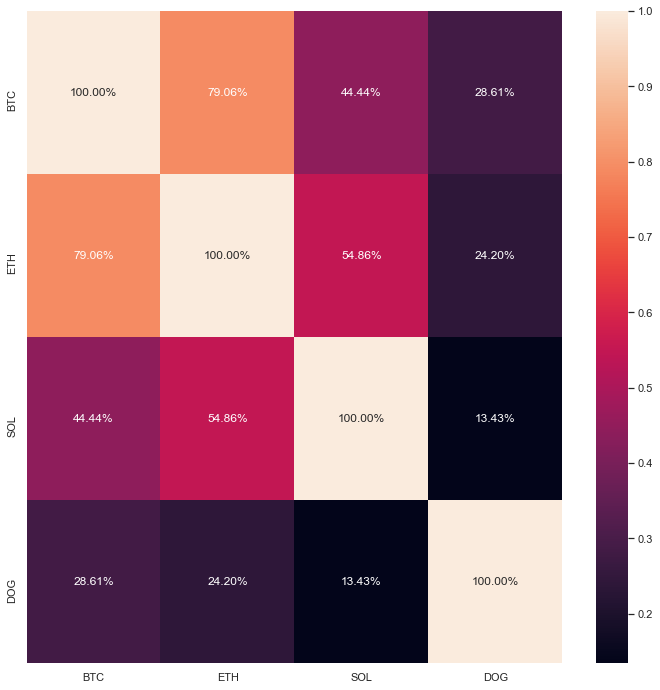

In [13]:
plt.subplots(figsize=(12, 12))
sns.heatmap(daily_returns.corr(), annot=True, fmt= '.2%')

## Daily cumulative simple returns

In [14]:
cumulative_returns = (daily_returns + 1).cumprod()
cumulative_returns

,BTC,ETH,SOL,DOG
Date,,,,
2021-01-27,0.934378,0.923459,0.911853,0.906360
2021-01-28,1.027518,0.981898,0.944339,4.128892
2021-01-29,1.053624,1.018765,0.947454,5.713144
2021-01-30,1.052185,1.014043,1.043714,3.413204
2021-01-31,1.016718,0.968998,1.053564,4.505875
...,...,...,...,...
2022-01-22,1.075542,1.772349,23.269144,16.098365
2022-01-23,1.113816,1.868040,24.603314,17.185100
2022-01-24,1.125407,1.798267,22.644486,16.692671


Text(0, 0.5, 'Growth of 1 dollar investment')

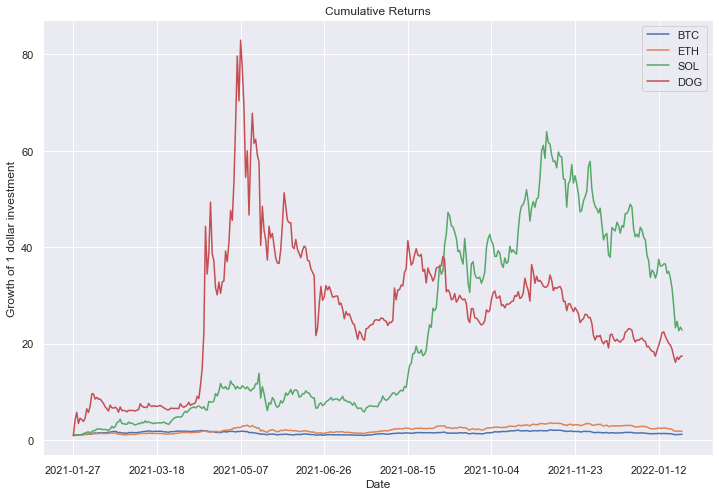

In [15]:
cumulative_returns.plot(figsize=(12,8))
plt.title('Cumulative Returns')
plt.ylabel('Growth of 1 dollar investment')

Text(0, 0.5, 'Growth of 1 dollar investment on BTC OR ETH')

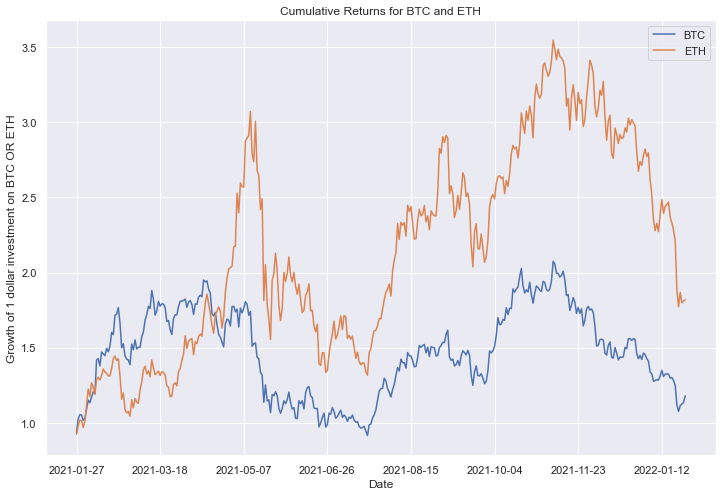

In [16]:
cumulative_returns[['BTC', 'ETH']].plot(figsize=(12,8))
plt.title('Cumulative Returns for BTC and ETH')
plt.ylabel('Growth of 1 dollar investment on BTC OR ETH')

## Value at Risk

In [17]:
tickers = ['BTC', 'ETC', 'SOL', 'DOG']
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [18]:
covariance = daily_returns.cov()
covariance

,BTC,ETH,SOL,DOG
BTC,0.001628,0.001671,0.001441,0.002489
ETH,0.001671,0.002745,0.002310,0.002734
SOL,0.001441,0.002310,0.006457,0.002328
DOG,0.002489,0.002734,0.002328,0.046494


In [19]:
average_returns = daily_returns.mean()
average_returns

BTC    0.001262
ETH    0.003022
SOL    0.011789
DOG    0.018715
dtype: float64

In [20]:
count = daily_returns.count()[0]
count

365

### Expected daily return of a portfolio & its std

In [21]:
portfolio_mean = average_returns @ weights
portfolio_mean

0.008697237908149918

In [22]:
portfolio_std = np.sqrt(weights.T @ covariance @ weights)
portfolio_std

0.07214049098399505

Text(0.5, 1.0, 'Distribution of daily return')

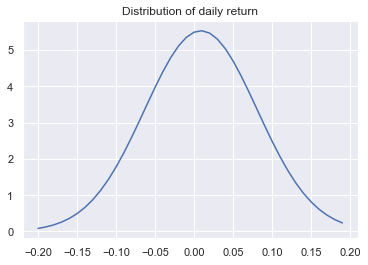

In [23]:
x = np.arange(-0.2, 0.2, 0.01)
norm_dist = norm.pdf(x, portfolio_mean, portfolio_std)
plt.plot(x, norm_dist)
plt.title('Distribution of daily return')

In [24]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level, portfolio_mean, portfolio_std)
VaR
# 95% Confident that I will not lose 11 percent of my portfolio in a Single day

-0.10996331033693438

In [25]:
num_days = 5
VaR * np.sqrt(num_days)
# 95% Confident that I will not lose 24 percent in 5 days

-0.24588543694429058

In [26]:
CI_lower = portfolio_mean - 1.960 * portfolio_std / np.sqrt(count)
CI_higher = portfolio_mean + 1.960 * portfolio_std / np.sqrt(count)

In [27]:
print(CI_lower,' - ', CI_higher)
# 95% confident that my returns is between these numbers

0.0012962663895382965  -  0.016098209426761538


## BTC Risk Analysis (Maximum Drawdown)

In [28]:
df['BTC']

Date
2021-01-26    32569.849609
2021-01-27    30432.546875
2021-01-28    33466.097656
2021-01-29    34316.386719
2021-01-30    34269.523438
                  ...     
2022-01-22    35030.250000
2022-01-23    36276.804688
2022-01-24    36654.328125
2022-01-25    36954.003906
2022-01-26    38411.300781
Name: BTC, Length: 366, dtype: float64

In [29]:
window = 30

In [30]:
# Calculate the max drawdown in the past window dadys for each day in the series
roll_max = df['BTC'].rolling(window, min_periods = 1).max()
daily_30_drawdown = df['BTC'] / roll_max - 1

In [32]:
# Calculate the minimum (negative) daily draw down in that particular window.
max_30_daily_drawdown = daily_30_drawdown.rolling(window, min_periods = 1).min()

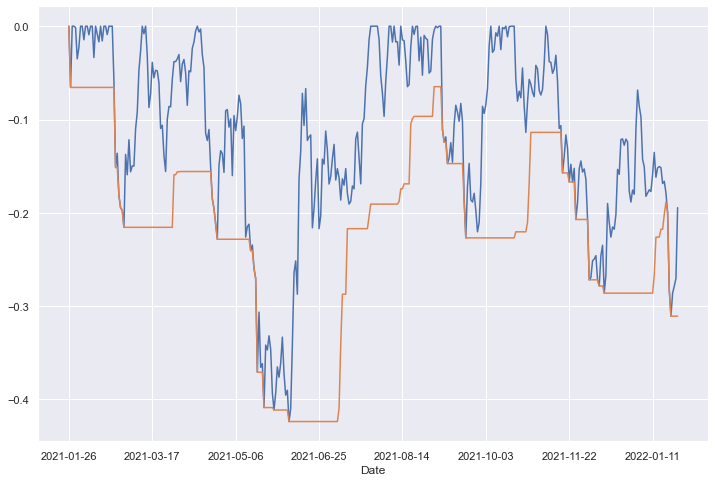

In [33]:
plt.figure(figsize=(12,8))
daily_30_drawdown.plot()
max_30_daily_drawdown.plot()

In [34]:
max_30_daily_drawdown.mean() # Oof. Just HoDL is not possible

-0.22053371874706681

## Now let proceed with backtesting strategies for bitcoin

In [39]:
df_btc = pd.read_csv('./data/BTC-USD.csv', index_col='Date')
df_btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-26,32358.613281,32794.550781,31030.265625,32569.849609,32569.849609,60255421470
2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,30432.546875,62576762015
2021-01-28,30441.041016,33858.312500,30023.207031,33466.097656,33466.097656,76517157706
2021-01-29,34318.671875,38406.261719,32064.814453,34316.386719,34316.386719,117894572511
2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,34269.523438,65141828798


In [40]:
# Calculating the moving average of 21 days
ma = 21
df_btc['ma'] = df_btc['Close'].rolling(ma).mean()

In [41]:
# Calculating Bollinger Band
df_btc['boll_top'] = df_btc['Close'].rolling(ma).std(2) + df_btc['ma']
df_btc['boll_btm'] = - df_btc['Close'].rolling(ma).std(2) + df_btc['ma']
df_btc

,Open,High,Low,Close,Adj Close,Volume,ma,boll_top,boll_btm
Date,,,,,,,,,
2021-01-26,32358.613281,32794.550781,31030.265625,32569.849609,32569.849609,60255421470,NaN,NaN,NaN
2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,30432.546875,62576762015,NaN,NaN,NaN
2021-01-28,30441.041016,33858.312500,30023.207031,33466.097656,33466.097656,76517157706,NaN,NaN,NaN
2021-01-29,34318.671875,38406.261719,32064.814453,34316.386719,34316.386719,117894572511,NaN,NaN,NaN
2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,34269.523438,65141828798,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405,42412.454799,45259.580344,39565.329255
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951,41885.387463,44800.832685,38969.942241
2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597,41418.540365,44350.881357,38486.199373


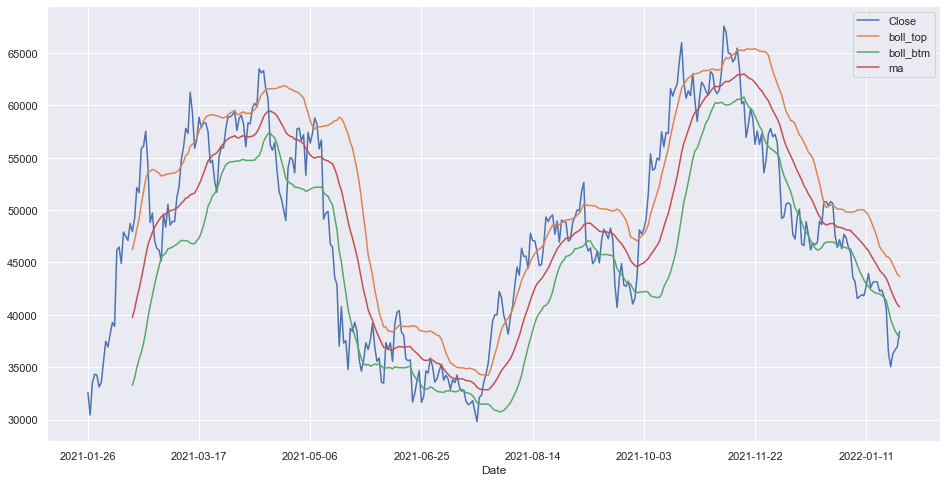

In [42]:
plt.figure(figsize=(16,8))
df_btc['Close'].dropna().plot(legend = True)
df_btc['boll_top'].plot(legend=True)
df_btc['boll_btm'].plot(legend=True)
df_btc['ma'].plot(legend=True)

## Design a simple strategy that utilizes simple moving averages, bollinger band as well as Relative Strength Index
## Let proceed to main.py for the back testing of the simple algorithm.